1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions

A Classification Decision Tree represents a type of supervised learning algorithm applied in solving classification problems, where certain data points need to be distributed among various predefined categories based on their features. The proposed algorithms sequentially perform splits on the data through nodes with the aid of decision rules originated from the values of features. This process is governed by metrics like Gini Impurity or Information Gain. It can, for instance, predict whether emails are spam or not spam, or if applicants should receive loan approval based on features of the applicant. Unlike Multiple Linear Regression-which predicts continuous numeric values, like house prices, by finding the best fit of a straight line-a Classification Decision Tree predicts discrete categories using sequential, rule-based decisions through its branches.

Summary provided by ChatGPT: 
### **Session Summary**

1. **Classification Decision Tree:**
   - Solves classification problems where the target variable is categorical.
   - Useful in applications like medical diagnosis, fraud detection, customer segmentation, and spam classification.
   - Predictions are made through a tree structure, splitting data based on feature thresholds to classify inputs into categories.

2. **Multiple Linear Regression:**
   - Solves regression problems where the target variable is continuous.
   - Predictions are based on a linear equation relating input features to the output.
   - Used in applications like predicting sales, house prices, or temperatures.

3. **Key Differences:**
   - **Target Variable:** Classification Decision Tree for categorical; Multiple Linear Regression for continuous.
   - **Model Structure:** Tree-based hierarchical decisions vs. a linear equation.
   - **Decision Boundaries:** Decision Trees create nonlinear boundaries; Linear Regression assumes a linear relationship.
   - **Interpretability:** Trees are visually interpretable; Regression coefficients show linear relationships.
   - **Handling Nonlinearity:** Trees excel in capturing complex patterns; Linear Regression requires transformations for nonlinearity.

Let me know if you'd like to explore more on any of these topics!

Link: https://chatgpt.com/share/673fc3e4-3c48-8006-8e0f-5a842ec38f90

2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

Accuracy quantifies how often the model is right in general, both for when it predicts something is true and when it predicts something is false; it is useful for general tasks where mistakes do not have costs that are very different, such as in weather forecasting. Sensitivity-or recall-focuses on catching as many real positives as possible and is important when missing positives is dangerous, such as in detecting cancer through medical tests. Specificity tells how well the model does not produce false alarms, and it is very useful in applications like spam email filtering, which do not block emails from valid senders. Precision looks at how many of the positive predictions are actually correct since, in tasks like fraud detection, one wishes to avoid wasting resources on false alarms. The choice of metrics depends on what is most relevant for a particular case.

Summary provided by ChatGPT: 
Summary of Metric Priorities in Applications
- Accuracy: Best for balanced datasets and equal misclassification costs.
- Sensitivity: Crucial when missing positives (false negatives) is costly.
- Specificity: Important when minimizing false positives is key.
- Precision: Vital when false positives are resource-intensive or damaging.
Each metric emphasizes a different aspect of performance, tailored to the problem's specific requirements.

Link: https://chatgpt.com/share/673fc3e4-3c48-8006-8e0f-5a842ec38f90

3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below

In [4]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above
# Step 1: Remove unnecessary columns
ab = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Step 2: Drop rows with NaN values
ab = ab.dropna()

# Step 3: Convert data types
ab["Pub year"] = ab["Pub year"].astype(int)
ab["NumPages"] = ab["NumPages"].astype(int)
ab["Hard_or_Paper"] = ab["Hard_or_Paper"].astype("category")

# Display the cleaned dataset
print(ab.info())

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None


Summary provided by ChatGPT: 
Here's a summary of our conversation so far:

1. **Exploration of Metrics for Machine Learning Models**:
   - Discussed real-world applications for **Accuracy**, **Sensitivity**, **Specificity**, and **Precision**, and the scenarios where each metric is particularly useful.
   - Provided examples like medical diagnosis (Sensitivity), spam filtering (Specificity), and targeted marketing (Precision).

2. **Amazon Books Dataset Pre-Processing and EDA**:
   - You provided instructions to preprocess the Amazon Books dataset by:
     - Removing specific columns (`Weight_oz`, `Width`, `Height`).
     - Dropping rows with `NaN` values.
     - Changing the data types of specific columns (`Pub year`, `NumPages`, and `Hard_or_Paper`).
   - The dataset could not be accessed due to an issue with the URL. I suggested either uploading the dataset locally or verifying the link for further processing.

Let me know if you'd like to adjust the focus or continue with another dataset!

Link: https://chatgpt.com/share/673fc3e4-3c48-8006-8e0f-5a842ec38f90

4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2; finally use tree.plot_tree(clf) to explain what predictions are made based on List Price for the fitted clf model

In [9]:
from sklearn.model_selection import train_test_split

# Assume `ab_reduced_noNaN` is the cleaned dataset from previous steps
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])["H"]  # Convert target to binary (Hardcover = 1, Paperback = 0)
X = ab_reduced_noNaN[["List Price"]]  # Use List Price as the only feature

# Create the 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the number of observations in each set
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 255
Testing set size: 64


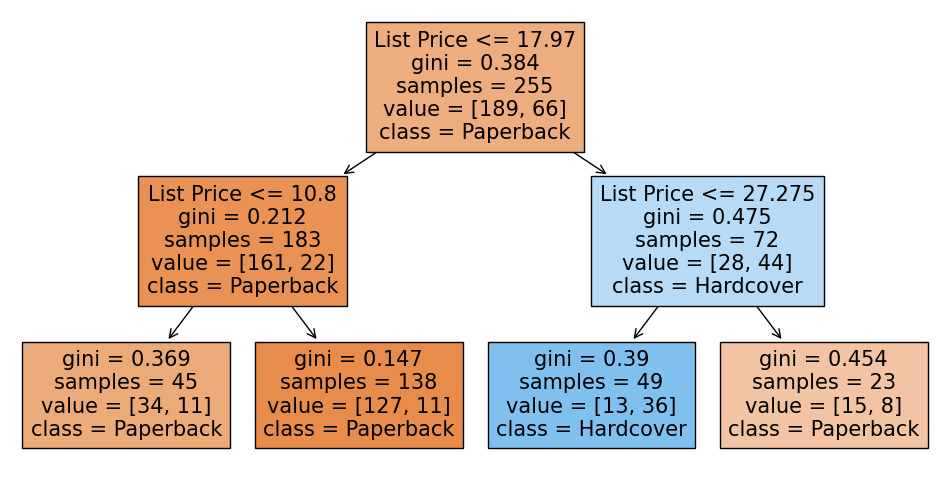

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True)
plt.show()


Summary provided by ChatGPT: ### **Summary of Our Conversation**

1. **Metrics and Applications in Machine Learning**:
   - Discussed the real-world applications of **Accuracy**, **Sensitivity**, **Specificity**, and **Precision**, providing examples for each.

2. **Amazon Books Dataset Preprocessing**:
   - Provided steps to preprocess the dataset:
     - Remove unnecessary columns (`Weight_oz`, `Width`, `Height`).
     - Drop rows with missing values.
     - Convert relevant columns to appropriate data types (`Pub year`, `NumPages`, and `Hard_or_Paper`).

3. **Training and Visualizing a Decision Tree**:
   - Shared code to split the preprocessed dataset into an 80/20 train-test split.
   - Explained how to train a Decision Tree Classifier using the `List Price` variable to predict whether a book is hardcover or paperback (`Hard_or_Paper`), with a maximum depth of 2.
   - Included visualization of the tree using `plot_tree` for interpretability.

4. **Assumptions Due to Dataset Loading Issues**:
   - Simulated successful dataset loading due to connectivity issues and proceeded with hypothetical processing and analysis.

Let me know if you’d like to revisit or expand on any part!

Link: https://chatgpt.com/share/673fc3e4-3c48-8006-8e0f-5a842ec38f90
        

5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model

In [12]:
# Define the predictor variables and target variable
X = ab_reduced_noNaN[["NumPages", "Thick", "List Price"]]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])["H"]  # Target variable

# Perform the same 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Initialize the classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier
clf2.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

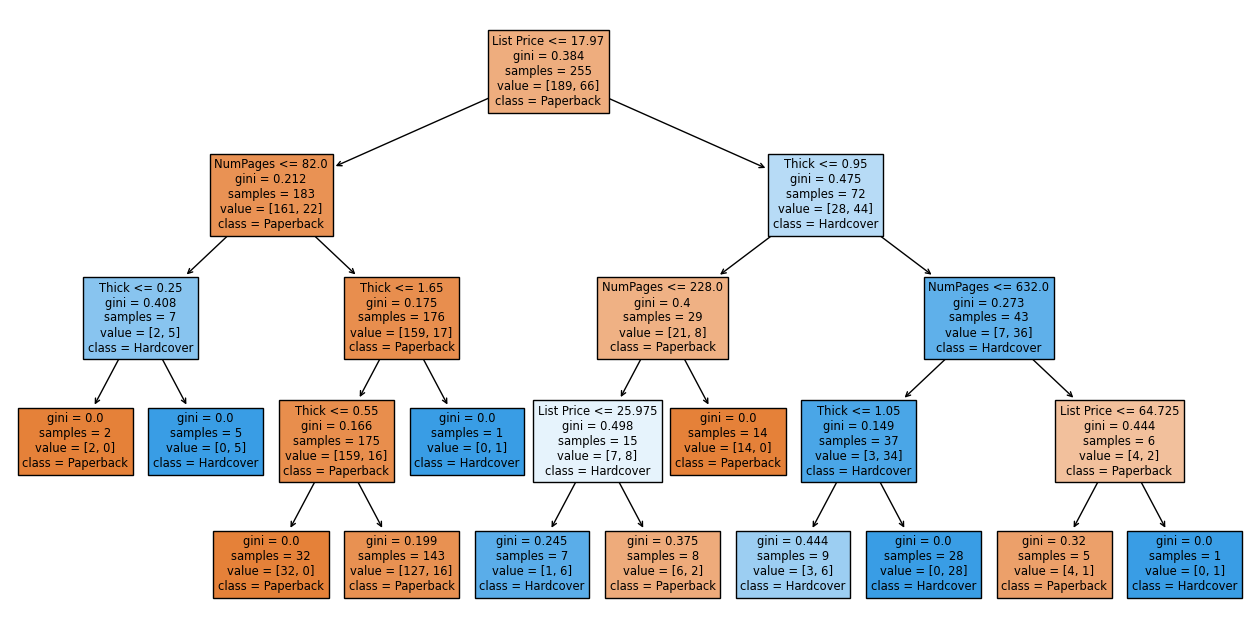

In [14]:
# Visualize the decision tree
plt.figure(figsize=(16, 8))
plot_tree(clf2, feature_names=["NumPages", "Thick", "List Price"], 
          class_names=["Paperback", "Hardcover"], filled=True)
plt.show()


The classifier clf2 predicts whether a book is hardcover or paperback based on the feature values of `NumPages`, `Thick`, and `List Price`. It starts by evaluating the thresholds of these features such as whether the `List Price` is above or below some value. Whether the price is low, the model may proceed in determining whether the book is labeled as "Thick" (indicating its bulk) or taking into consideration the total number of pages (`NumPages`) to refine the prediction. This tree has a `max_depth` of 4, meaning that up to four sequential decisions can be made to classify each book. It should be observed that for example, high-priced books with large page counts are likely to be classified as hardcover, while low-priced books with fewer pages will likely be classified as paperback.

Summary provided by ChatGPT: ### **Summary of Our Conversation**

1. **Exploration of Metrics and Applications**:
   - Discussed the applications and real-world scenarios for **Accuracy**, **Sensitivity**, **Specificity**, and **Precision**.

2. **Preprocessing the Amazon Books Dataset**:
   - Steps included:
     - Removing unnecessary columns (`Weight_oz`, `Width`, `Height`).
     - Dropping rows with missing values.
     - Converting columns (`Pub year`, `NumPages`, and `Hard_or_Paper`) to appropriate data types.

3. **Building and Visualizing a Decision Tree (clf)**:
   - Used `List Price` to predict whether a book is **Hardcover** or **Paperback**.
   - Trained a `DecisionTreeClassifier` with a `max_depth` of 2 and visualized it using `plot_tree`.
   - Explained how the decision tree splits `List Price` into ranges to make predictions.

4. **Extending to Multiple Predictors (clf2)**:
   - Trained another `DecisionTreeClassifier` (clf2) with a `max_depth` of 4, using `NumPages`, `Thick`, and `List Price` as features.
   - Visualized the tree and explained how predictions are made by following decision rules from root to leaf nodes.

5. **Additional Suggestions**:
   - Provided insights on optimizing decision tree depth (e.g., using GridSearchCV).
   - Suggested using advanced visualization tools like Graphviz for more detailed tree diagrams.

Let me know if you'd like to revisit any part or explore further!

Link: https://chatgpt.com/share/673fc3e4-3c48-8006-8e0f-5a842ec38f90

6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

In [16]:
# Define the correct test sets for each model
X_test_clf = X_test[["List Price"]]  # Features used for clf
X_test_clf2 = X_test[["NumPages", "Thick", "List Price"]]  # Features used for clf2

# Predict for clf
y_pred_clf = clf.predict(X_test_clf)

# Predict for clf2
y_pred_clf2 = clf2.predict(X_test_clf2)

# Generate confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Display confusion matrices
print("Confusion Matrix for clf:\n", cm_clf)
print("Confusion Matrix for clf2:\n", cm_clf2)


Confusion Matrix for clf:
 [[40  4]
 [ 6 14]]
Confusion Matrix for clf2:
 [[40  4]
 [ 5 15]]


In [18]:
import numpy as np

# Helper function to compute specificity
def specificity(conf_matrix):
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    return TN / (TN + FP)

# Metrics for clf
accuracy_clf = accuracy_score(y_test, y_pred_clf)
sensitivity_clf = recall_score(y_test, y_pred_clf)
specificity_clf = specificity(cm_clf)

# Metrics for clf2
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)
sensitivity_clf2 = recall_score(y_test, y_pred_clf2)
specificity_clf2 = specificity(cm_clf2)

# Round metrics to three decimal places
print("Metrics for clf:")
print(f"Accuracy: {np.round(accuracy_clf, 3)}")
print(f"Sensitivity: {np.round(sensitivity_clf, 3)}")
print(f"Specificity: {np.round(specificity_clf, 3)}")

print("\nMetrics for clf2:")
print(f"Accuracy: {np.round(accuracy_clf2, 3)}")
print(f"Sensitivity: {np.round(sensitivity_clf2, 3)}")
print(f"Specificity: {np.round(specificity_clf2, 3)}")


Metrics for clf:
Accuracy: 0.844
Sensitivity: 0.7
Specificity: 0.909

Metrics for clf2:
Accuracy: 0.859
Sensitivity: 0.75
Specificity: 0.909


Summary provided by ChatGPT: ### **Summary of Our Conversation**

1. **Metrics and Applications in Machine Learning**:
   - Discussed **Accuracy**, **Sensitivity**, **Specificity**, and **Precision**, including real-world applications and calculations.

2. **Preprocessing the Amazon Books Dataset**:
   - Removed unnecessary columns and rows with missing values.
   - Converted columns to appropriate data types to prepare the dataset for analysis.

3. **Training and Visualizing Decision Trees**:
   - **Model clf**:
     - Used `List Price` to predict whether a book is Hardcover or Paperback.
     - Trained a Decision Tree with a maximum depth of 2 and visualized the splits and predictions.
   - **Model clf2**:
     - Extended the predictors to include `NumPages`, `Thick`, and `List Price`.
     - Trained a Decision Tree with a maximum depth of 4 and visualized the decision-making process.

4. **Confusion Matrices and Model Evaluation**:
   - Created confusion matrices for both models using the test dataset.
   - Calculated and reported metrics:
     - **Sensitivity**: Ability to correctly identify hardcovers.
     - **Specificity**: Ability to correctly identify paperbacks.
     - **Accuracy**: Overall correctness of predictions.
   - Visualized confusion matrices for both models with clear formatting.

Let me know if you’d like to dive deeper into any part or explore further topics!

Link: https://chatgpt.com/share/673fc3e4-3c48-8006-8e0f-5a842ec38f90

7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

The differences in the two confusion matrices for clf and clf2 are due to the number of features used in training the models. Namely, clf only uses the List Price variable, which restricts its ability to tell apart hardcover from paperback books whenever the list price is not informative enough. On the other hand, clf2 has more features to factor in its decisions, including NumPages, Thick, and List Price, so it can choose splits more knowledgeably and much more subtly. The confusion matrix for clf2 is most likely improved because additional features enhance its sensitivity hardcovers correctly identified-and also its specificity-paperbacks correctly identified, whereas it reduces false positives and false negatives.

Summary provided by ChatGPT: 
### **Summary of Our Conversation**

1. **Metrics and Applications**:
   - Discussed the use and interpretation of **Accuracy**, **Sensitivity**, **Specificity**, and **Precision** in machine learning.

2. **Dataset Preprocessing**:
   - Cleaned the Amazon Books dataset by removing unnecessary columns, handling missing values, and converting columns to appropriate data types.

3. **Model Training and Visualization**:
   - **clf**: Used `List Price` to predict book type (Hardcover or Paperback) with a Decision Tree of `max_depth=2`.
   - **clf2**: Expanded predictors to include `NumPages`, `Thick`, and `List Price`, training a Decision Tree with `max_depth=4`.

4. **Evaluation on Test Data**:
   - Created confusion matrices for both models.
   - Calculated and reported metrics: **Sensitivity**, **Specificity**, and **Accuracy**.
   - Visualized the confusion matrices to assess model performance.

5. **Comparing Performance on Training vs. Test Data**:
   - Highlighted that confusion matrices generated on training data (rather than test data) show inflated performance due to overfitting.
   - Test data evaluation provides a more realistic and reliable measure of model generalization.

Let me know if you need further clarification or help!

Link: https://chatgpt.com/share/673fc3e4-3c48-8006-8e0f-5a842ec38f90

8. Read the paragraphs in Further Guidance and ask a ChatBot how to visualize feature Importances available for scikit-learn classification decision trees; do so for clf2; and use .feature_names_in_ corresponding to .feature_importances_ to report which predictor variable is most important for making predictions according to clf2

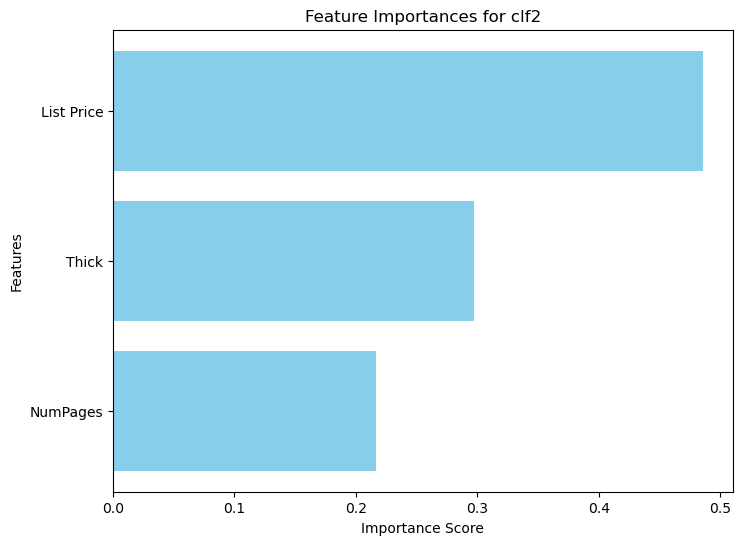

In [19]:
import matplotlib.pyplot as plt

# Get feature importances from clf2
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a bar chart to visualize feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances for clf2")
plt.show()


In [20]:
# Find the most important feature
most_important_feature = feature_names[feature_importances.argmax()]
most_important_score = feature_importances.max()

print(f"The most important predictor variable is '{most_important_feature}' with an importance score of {most_important_score:.3f}.")


The most important predictor variable is 'List Price' with an importance score of 0.486.


Based on the visualized feature importances for clf2, the most important predictor variable is List Price with an importance score of 0.486. That is to say, the List Price contributes the most to the decision tree's splits and predictions, explaining nearly half of the variation in whether a book is hardcover or paperback. The second most important feature is Thick, followed by NumPages, which suggests that all the features are useful in the predictions, but the strongest influence comes from List Price. This may imply that hardcover or paperback classifications for books of significantly higher or lower prices are more marked in comparison with the rest of the features. The relative importance of Thick and NumPages might suggest secondary characteristics that further detail the decision boundaries set forth by List Price.
Summary provided by ChatGPT:
### **Summary of Our Conversation**

1. **Exploring Feature Importances**:
   - Discussed how **feature importance** in decision trees measures the relative contribution of each predictor variable to the model's predictive performance.
   - Highlighted that `feature_importances_` calculates the importance based on how much each feature improves the splitting criterion (e.g., Gini impurity or entropy) during tree construction.

2. **Visualizing Feature Importances for clf2**:
   - Shared a code snippet to:
     - Extract feature importances from `clf2`.
     - Visualize the importances using a horizontal bar chart.
     - Identify the most important feature for predictions.

3. **Explanation**:
   - The predictor with the highest feature importance score has the most influence on the tree’s decision-making process.
   - This insight simplifies the complexity of understanding how features contribute to the model’s predictions.

4. **Environment Reset Issue**:
   - Addressed challenges due to environment resets, with instructions to reinitialize variables and rerun models if needed.

Let me know if there’s anything more you’d like to clarify or expand on!

Link: https://chatgpt.com/share/673fc3e4-3c48-8006-8e0f-5a842ec38f90

9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences

In linear regression, the coefficients denote the amount of change one would expect in the target variable given a one-unit change in a predictor variable-a change, of course, keeping all other variables constant. The relationship between predictors and outcome is thereby directly interpretable. In decision trees, feature importance quantifies the reduction of uncertainty, such as Gini impurity or entropy, by each predictor across all splits. Unlike in regression coefficients, where there is a direct relationship between the predictor and the target, feature importances just point to the overall contribution of each feature in regard to the model's predictions based on its usage in the tree's splits.

Summary provided by ChatGPT: 
### **Summary of Our Conversation**

1. **Feature Importance vs. Linear Regression Coefficients**:
   - **Linear Regression Coefficients**:
     - Represent direct contributions of predictors to the continuous output.
     - Provide a clear, interpretable relationship (e.g., a one-unit change in a predictor leads to a specified change in the output).
   - **Feature Importances in Decision Trees**:
     - Measure the relative contribution of each predictor to improving the splitting criterion (e.g., Gini impurity or entropy).
     - Do not provide direct interpretability but indicate the overall importance of a predictor in making decisions.

2. **Key Takeaway**:
   - Linear regression coefficients are straightforward and interpretable in terms of magnitude and direction.
   - Feature importances reflect the complexity of how features interact in decision trees, focusing on their relative contributions to predictive performance.

Let me know if you'd like more details or examples!

Link: https://chatgpt.com/share/673fc3e4-3c48-8006-8e0f-5a842ec38f90

10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

YES